<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S8/S8_AssignmentSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load required libraries**

In [1]:
from __future__ import print_function
#this helps in plotting the graphs right below that particular cell and also gets stored in the notebook document
%matplotlib inline 
# mount the drive 
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# add path to our library in default search path
import sys
sys.path.append('/content/drive/My Drive/EVA4B2-TSAI/EVA4_Library')

**Import packages from Drive**

In [0]:
from rohan_library import *  # consists of all the packages required
import execute # this is to train & test the model
import image_transformations # to apply different image transformations
import DataLoaders as loader
import visualizeData as viz
import cifar10_models as models # consists of CNN models built on CIFAR10 Dataset
from resNet import ResNet18
import utils 

**Apply Image Transforms**

In [0]:

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)

fillMeans = (np.array(channel_means)*255).astype(np.uint8)
trans = image_transformations.Transforms(normalize=True, mean=channel_means, stdev=channel_stdevs)

trainTrans = trans.train_transforms([
                                     transforms.RandomRotation((-15.0, 15.0), fill=tuple(fillMeans)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.RandomVerticalFlip(p=0.5)
])
testTrans = trans.test_transforms()
                                       

**Load Train & Test Dataset**

In [6]:
train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = trainTrans)
test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = testTrans)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


**Dataloaders for Train & Test Dataset**

In [0]:

dl = loader.DataLoaders()
trainloader = dl.dataLoader(train)
testloader = dl.dataLoader(test) 


**Display random training Images**

plane   dog  deer  deer


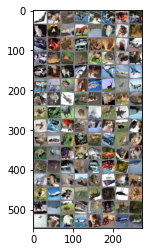

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
viz.plotImage(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**Model Summary**

In [9]:

# !pip install torchsummary
from torchsummary import summary


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print('Device set to', device)


model = ResNet18().to(device)
summary(model, input_size=(3, 32, 32))


Device set to cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14

**Run the model**

In [10]:
incorrect_samples = []
model = ResNet18().to(device)


criterion = utils.cross_entropy_loss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=20)

model1 = execute.Test_Train()
EPOCHS = 20

for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainloader, optimizer, epoch, scheduler, criterion, L1lambda=1e-5)
  model1.test(model, device, testloader,"model.pt", criterion, incorrect_samples)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=2.3131566047668457 Batch_id=390 Accuracy=41.25: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0001).  Saving model ...

Test set: Average loss: 0.0001, Accuracy: 4978/10000 (49.78%)

EPOCH: 2


Loss=1.9808642864227295 Batch_id=390 Accuracy=54.98: 100%|██████████| 391/391 [03:09<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0002, Accuracy: 5332/10000 (53.32%)

EPOCH: 3


Loss=2.074770927429199 Batch_id=390 Accuracy=62.31: 100%|██████████| 391/391 [03:08<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0001 --> 0.0001).  Saving model ...

Test set: Average loss: 0.0001, Accuracy: 5615/10000 (56.15%)

EPOCH: 4


Loss=1.5632996559143066 Batch_id=390 Accuracy=67.37: 100%|██████████| 391/391 [03:08<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0001 --> 0.0001).  Saving model ...

Test set: Average loss: 0.0001, Accuracy: 6190/10000 (61.90%)

EPOCH: 5


Loss=1.4104204177856445 Batch_id=390 Accuracy=70.81: 100%|██████████| 391/391 [03:08<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0001 --> 0.0001).  Saving model ...

Test set: Average loss: 0.0001, Accuracy: 6928/10000 (69.28%)

EPOCH: 6


Loss=1.3500685691833496 Batch_id=390 Accuracy=72.55: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0001 --> 0.0001).  Saving model ...

Test set: Average loss: 0.0001, Accuracy: 7228/10000 (72.28%)

EPOCH: 7


Loss=1.4863739013671875 Batch_id=390 Accuracy=74.56: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 6986/10000 (69.86%)

EPOCH: 8


Loss=1.0746753215789795 Batch_id=390 Accuracy=76.05: 100%|██████████| 391/391 [03:10<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0001 --> 0.0001).  Saving model ...

Test set: Average loss: 0.0001, Accuracy: 7743/10000 (77.43%)

EPOCH: 9


Loss=1.0757722854614258 Batch_id=390 Accuracy=77.36: 100%|██████████| 391/391 [03:10<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 7562/10000 (75.62%)

EPOCH: 10


Loss=1.1799613237380981 Batch_id=390 Accuracy=78.38: 100%|██████████| 391/391 [03:10<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 7574/10000 (75.74%)

EPOCH: 11


Loss=1.2697134017944336 Batch_id=390 Accuracy=79.34: 100%|██████████| 391/391 [03:10<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 7789/10000 (77.89%)

EPOCH: 12


Loss=1.036333680152893 Batch_id=390 Accuracy=80.48: 100%|██████████| 391/391 [03:10<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0001 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 7900/10000 (79.00%)

EPOCH: 13


Loss=0.8563289046287537 Batch_id=390 Accuracy=81.44: 100%|██████████| 391/391 [03:10<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 8105/10000 (81.05%)

EPOCH: 14


Loss=0.9077317714691162 Batch_id=390 Accuracy=82.67: 100%|██████████| 391/391 [03:10<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0000, Accuracy: 8197/10000 (81.97%)

EPOCH: 15


Loss=0.9618320465087891 Batch_id=390 Accuracy=83.90: 100%|██████████| 391/391 [03:10<00:00,  2.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0000, Accuracy: 8226/10000 (82.26%)

EPOCH: 16


Loss=0.7207037210464478 Batch_id=390 Accuracy=85.33: 100%|██████████| 391/391 [03:10<00:00,  2.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 8434/10000 (84.34%)

EPOCH: 17


Loss=0.82240891456604 Batch_id=390 Accuracy=87.00: 100%|██████████| 391/391 [03:10<00:00,  2.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0000, Accuracy: 8643/10000 (86.43%)

EPOCH: 18


Loss=0.6131508350372314 Batch_id=390 Accuracy=88.86: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0000, Accuracy: 8808/10000 (88.08%)

EPOCH: 19


Loss=0.5821353197097778 Batch_id=390 Accuracy=90.90: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 8893/10000 (88.93%)

EPOCH: 20


Loss=0.5825313329696655 Batch_id=390 Accuracy=91.84: 100%|██████████| 391/391 [03:11<00:00,  2.05it/s]



Test set: Average loss: 0.0001, Accuracy: 8922/10000 (89.22%)



**Plot Training & Test Stats**

Text(0.5, 1.0, 'Test Accuracy')

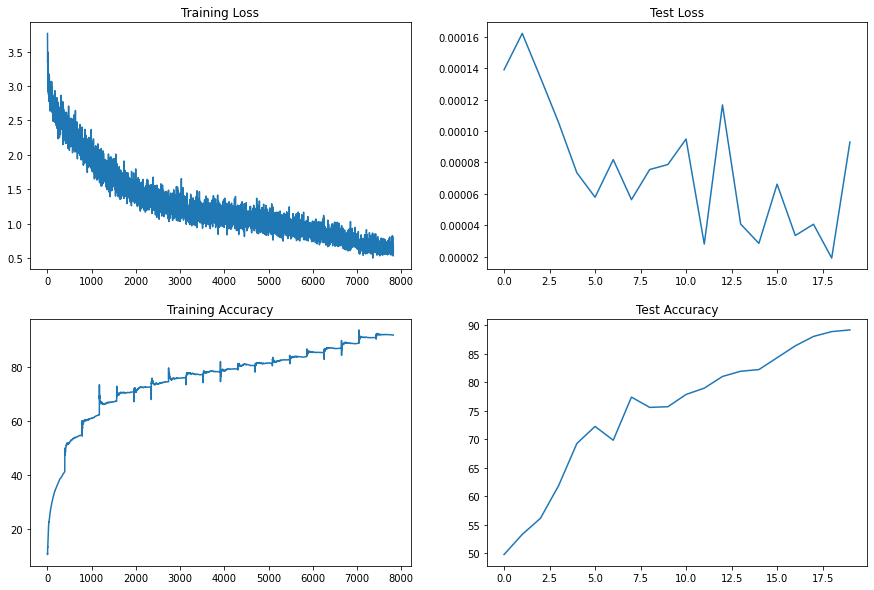

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(model1.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(model1.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(model1.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(model1.test_acc)
axs[1, 1].set_title("Test Accuracy")


**Display Misclassified Images from the Model**

Misclassifed Images from Model
******************************


<Figure size 936x936 with 0 Axes>

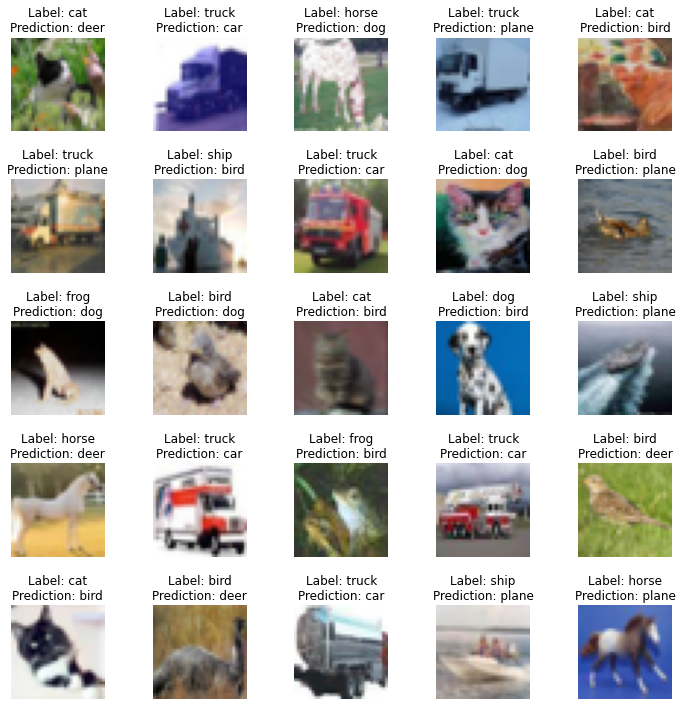

In [13]:
print('Misclassifed Images from Model')
print('*'*30)
viz.misclassifiedOnes(model,testloader, incorrect_samples,'CIFAR10.png')
